# Healthylife insurance charge prediction - Project 2

## Problem Statement
HealthyLife is a leading insurance company headquartered in New York City, serving customers nationwide with a range of insurance policies, including health, auto, and life insurance. Currently, the company relies on traditional methods to assess insurance charges based on customer details such as age, sex, and BMI. However, they face challenges in accurately predicting insurance charges due to limited insights into how different customer attributes impact premiums. This uncertainty leads to potential underpricing or overpricing of policies, affecting both profitability and customer satisfaction. To address these challenges, the company is looking to leverage advanced predictive modeling techniques to enhance its insurance charge estimation process and provide more accurate and personalized pricing to customers.

## Objective
As a Data Scientist hired by the insurance company, the objective is to develop an app and implement a predictive model for estimating insurance charges based on customer attributes. The primary challenges to solve include improving the accuracy of insurance charge predictions by incorporating various customer attributes, streamlining the underwriting process to enhance efficiency and customer experience, and maintaining regulatory compliance while optimizing pricing strategies also analyze and identify the driftness in model and data to understand the model behavior overtime

By achieving these objectives


*   We aim to achieve more accurate and personalized insurance charge estimations
*   Reducing the risks of underpricing and overpricing
*   Improve customer satisfaction and loyalty through fair and competitive pricing
*   Ensuring transparency and compliance with regulatory requirements in pricing strategies will further strengthen our competitive position in the market and enhance overall business performance









### Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# For saved figure display
from IPython.display import Image, display
import os

sns.set(style='whitegrid')

## Import the Data

In [ ]:
# Read data
df = pd.read_csv('/content/sample_data/insurance.csv')
df.head(4)


In [ ]:
rows, cols = df.shape
print("Number of rows:", rows)
print("Number of columns:", cols)


In [ ]:
df.dtypes

In [ ]:
df = df.drop(columns=['index'])

In [ ]:
df.shape[1]

In [ ]:
# split data in to numerical and categorical
numerical_cols = df.columns[df.dtypes != 'object']
numerical_cols

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# display the statistical summary of the numerical, categorical and target data
categorical_cols= df[['sex', 'smoker', 'region']]
numeric_cols= df[['age', 'bmi', 'children', 'charges']]
target_col= df['charges']


In [ ]:
categorical_cols.describe()

In [ ]:
numeric_cols.drop(columns=['charges']).describe()

In [ ]:
target_col.describe()

#### Write your insights and findings from the statistical summary
####
* --There are 1,338 people in the categorical_col dataframe with 676 males which make up 50.52% of the samples, and the remaining 662 being females, making up the the remaining 49.47%. Also the number of non-smokers exceeded that of smokers, with 1064 which represented about 79.52% of the samples being non-smokers, as opposed to only 20.48% who smoked.Also, the samples are distributed across four regions, majority of which are from the Southeast-region, with a total number of 364, which represents 27.20% of the samples

* The numeric_cols dataframe data distribution is largely right skewed as seen from the mean which is slightly above the median (50th percentile mark)in each of the three columns of ["age","bmi", "children" ].There are 1,338 age,bmi and children samples or entries.The age distribution is the most variable distribution with standard deviation of 14, followed by bmi at 6.09 and children at 1.2. The range of data distribution is highest for the age column with max and min differential of 64-18=46 as compared to 53-15=38 and 5-0 =5 respectively.The first, second (median) and third quartiles of 27,39 and 51 is highest for the age column, which is followed by bmi and children respectively.--
* The minimum and maximum charges are approximately 1,121 and 63,770 with insurance charges averaging the price of 9,382(median) which in this scenario is a better representation of the central value than the mean charge of 13,270 which is appears to skew the data rightwards and is more than the median.The third quartile (75th percentile) and first quartile (25th percentile) are 16,639 and 4,740 respectively.--

In [ ]:
# Check the missing values
missing_values = df.isnull().sum()
missing_values

In [ ]:
# check duplicated rows
num_duplicate_count = numeric_cols.duplicated().sum()
print("Number of duplicate rows:", num_duplicate_count)

# Remove duplicates if any
if num_duplicate_count > 0:
    numeric_cols = numeric_cols.drop_duplicates()
    print("Duplicates removed. New shape:", numeric_cols.shape)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 1
Duplicates removed. New shape: (1337, 4)


In [ ]:
cat_duplicate_count = categorical_cols.duplicated().sum()
print("Number of duplicate rows:", cat_duplicate_count)

# Remove duplicates if any
if cat_duplicate_count > 0:
    categorical_cols = categorical_cols.drop_duplicates()
    print("Duplicates removed. New shape:", categorical_cols.shape)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 1322
Duplicates removed. New shape: (16, 3)


In [ ]:
targ_duplicate_count = target_col.duplicated().sum()
print("Number of duplicate rows:", targ_duplicate_count)

# Remove duplicates if any
if targ_duplicate_count > 0:
    target_col= target_col.drop_duplicates()
    print("Duplicates removed. New shape:", target_col.shape)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 1
Duplicates removed. New shape: (1337,)


In [ ]:
numeric_cols.duplicated().sum()

np.int64(0)

In [ ]:
categorical_cols.duplicated().sum()

np.int64(0)

In [ ]:
categorical_cols.head(16)

In [ ]:
target_col.duplicated().sum()

np.int64(0)

In [ ]:
# display the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Exploratory data analysis

#### Charges amount distribution per sex

In [ ]:
# Display a histogram to visualize the distribution of charges based on sex in the dataset

# Histogram of charges distribution by sex
# Read dataset (df may not be defined in this cell)

fig, ax = plt.subplots()
sns.histplot(data=df, x='charges', hue='sex', kde=True, element='step', ax=ax)
ax.set_title('Distribution of Charges by Sex')
file_path_img = 'charges_by_sex.png'
fig.savefig(file_path_img)
plt.close(fig)
# Display the saved image
display(Image(filename=file_path_img))


#### Distribution of Age

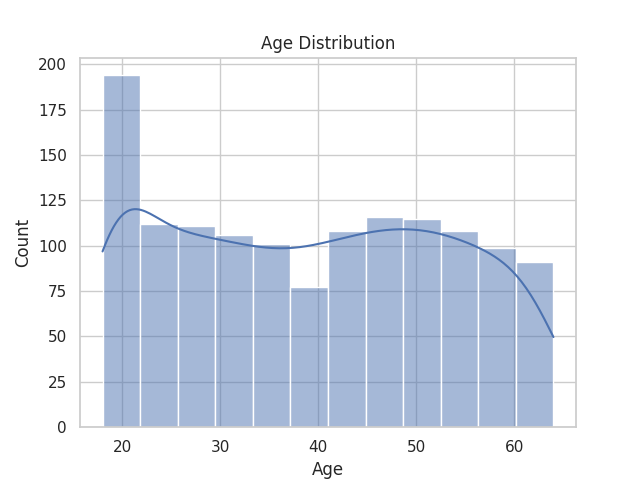

In [ ]:
fig, ax = plt.subplots()
sns.histplot(df['age'], kde=True, ax=ax)
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

age_file = 'age_distribution.png'
fig.savefig(age_file)
plt.close(fig)
display(Image(filename=age_file))








#### Charges amount distribution per smoker

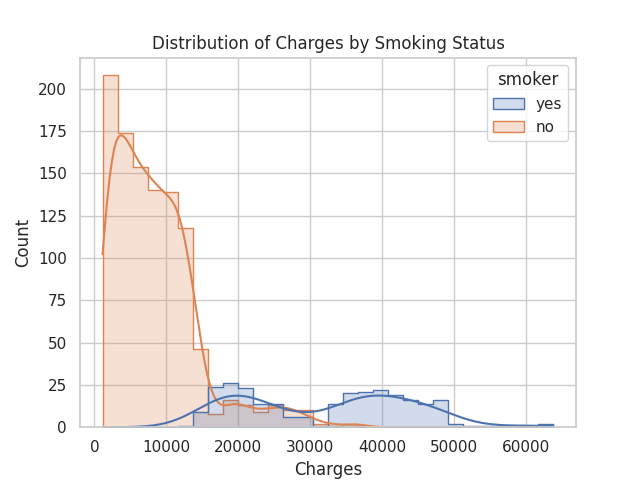

In [ ]:
# Show a histogram to visualize the distribution of charges amounts based on smoking status in the dataset
fig, ax = plt.subplots()
sns.histplot(data=df, x='charges', hue='smoker', kde=True, ax=ax, element="step")
ax.set_title('Distribution of Charges by Smoking Status')
ax.set_xlabel('Charges')
ax.set_ylabel('Count')

# Save and display
smoker_file = 'charges_by_smoker.png'
fig.savefig(smoker_file)
plt.close(fig)
display(Image(filename=smoker_file))

#### Average BMI per age

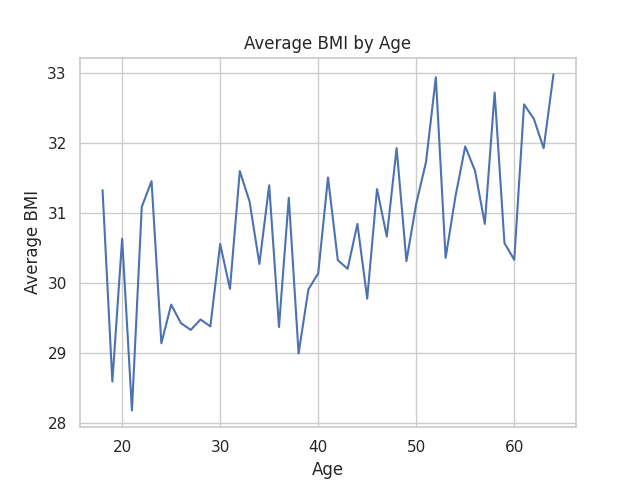

In [ ]:
# Display a line plot showing the average BMI per age using markers to highlight the data points
# Calculate average BMI per age
avg_bmi_by_age = df.groupby('age')['bmi'].mean().reset_index()

# Plot trend
fig, ax = plt.subplots()
sns.lineplot(data=avg_bmi_by_age, x='age', y='bmi', ax=ax)
ax.set_title('Average BMI by Age')
ax.set_xlabel('Age')
ax.set_ylabel('Average BMI')

# Save and display
bmi_file = 'bmi_per_age.png'
fig.savefig(bmi_file)
plt.close(fig)
display(Image(filename=bmi_file))


As we can see with time - the average BMI score starts getting higher to unhealthier ranges.

#### Age vs charges

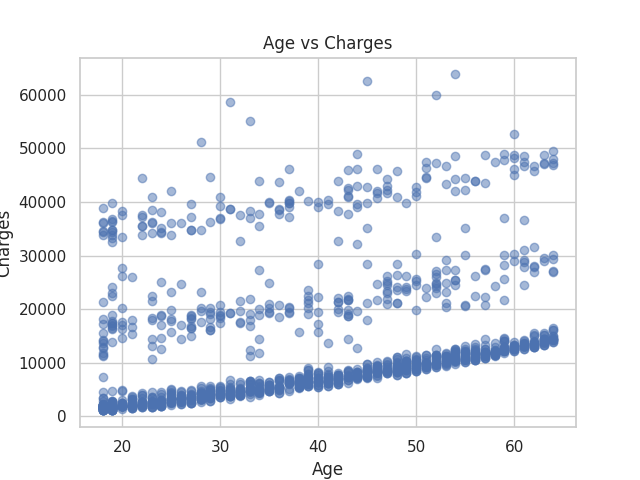

In [ ]:
# Create a scatter plot to show the relationship between age and charges in the dataset.
# Create scatter plot using matplotlib
fig, ax = plt.subplots()
ax.scatter(df['age'], df['charges'], alpha=0.5)
ax.set_title('Age vs Charges')
ax.set_xlabel('Age')
ax.set_ylabel('Charges')

# Save and display plot
scatter_file_matplotlib = 'age_vs_charges_matplotlib.png'
fig.savefig(scatter_file_matplotlib)
plt.close(fig)
display(Image(filename=scatter_file_matplotlib))

## Model Estimation

In [ ]:
# write you are code here
# Separate features and target
y = df['charges']
X = df.drop('charges', axis=1)

# Identify categorical and numerical columns
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# Preprocessing: scale numeric features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Model definition (you could use other regressors like RandomForestRegressor)
model = LinearRegression()

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', LinearRegression())])

## Model Evaluation

In [ ]:
# write you are code here
# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

# Save the trained model pipeline
joblib.dump(pipeline, 'model.joblib')


Mean Squared Error: 33596915.85136146
R2 Score: 0.7835929767120723


['model.joblib']

## Serialization

In [ ]:
# Display information about the scikit-learn package

%%writefile app.py
import gradio as gr
import pandas as pd
import joblib
from pathlib import Path
import uuid
import json
from huggingface_hub import CommitScheduler

# Load the trained model pipeline
model = joblib.load("model.joblib")

# Prepare log file and commit scheduler for logging predictions
log_file = Path("logs") / f"data_{uuid.uuid4()}.json"
log_folder = log_file.parent

# Replace the repo_id string with your own Hugging Face dataset repo for logs
scheduler = CommitScheduler(
    repo_id="https://huggingface.co/dariuscyrus7819/insurance-charge-logs",  # provide a repo id like "username/insurance-charge-logs"
    repo_type="dataset",
    folder_path=log_folder,
    path_in_repo="data",
    every=2
)


def predict_charges(age, bmi, children, sex, smoker, region):
    """
    Predict insurance charges given user inputs. Also logs the request and response.
    Parameters correspond to model features.
    """
    # Construct a single-row DataFrame
    input_df = pd.DataFrame([{
        'age': age,
        'bmi': bmi,
        'children': children,
        'sex': sex,
        'smoker': smoker,
        'region': region
    }])
    # Generate prediction
    prediction = model.predict(input_df)[0]

    # Log request and prediction
    with scheduler.lock:
        with log_file.open("a") as f:
            f.write(json.dumps({
                'age': age,
                'bmi': bmi,
                'children': children,
                'sex': sex,
                'smoker': smoker,
                'region': region,
                'prediction': prediction
            }))
            f.write("\n")
    return prediction

# Define the Gradio interface
demo = gr.Interface(
    fn=predict_charges,
    inputs=[
        gr.Number(label="Age", precision=0),
        gr.Number(label="BMI"),
        gr.Number(label="Number of Children", precision=0),
        gr.Radio(choices=['male', 'female'], label="Sex"),
        gr.Radio(choices=['yes', 'no'], label="Smoker"),
        gr.Dropdown(choices=['southwest', 'southeast', 'northwest', 'northeast'], label="Region")
    ],
    outputs=gr.Number(label="Predicted Insurance Charges"),
    title="HealthyLife Insurance Charge Prediction",
    description="Estimate insurance charges based on applicant information."
)

if __name__ == "__main__":
    # Start the gradio app. Do not set share=True here; HF Space will handle this.
    demo.queue()
    demo.launch()


Writing app.py


In [ ]:
# Generate a requirements.txt file for the project's dependencies
%%writefile requirements.txt
pandas
numpy
scikit-learn
matplotlib
seaborn
gradio
joblib
huggingface_hub

Writing requirements.txt


In [ ]:
# train.py
"""
Training script for Healthy Life Insurance charge prediction model.

- Loads insurance.csv
- Builds preprocessing + regression pipeline
- Trains the model
- Saves the trained pipeline as model.joblib
"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


def load_data(csv_path: str = "insurance.csv"):
    """Load the insurance dataset."""
    df = pd.read_csv(csv_path)
    X = df.drop("charges", axis=1)
    y = df["charges"]
    return X, y


def build_pipeline():
    """Build preprocessing + model pipeline."""
    numeric_features = ["age", "bmi", "children"]
    categorical_features = ["sex", "smoker", "region"]

    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown="ignore")

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ]
    )

    model = RandomForestRegressor(
        n_estimators=100,
        random_state=42,
    )

    pipeline = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", model),
        ]
    )

    return pipeline


def train_and_save_model(
    csv_path: str = "/content/sample_data/insurance.csv",
    model_path: str = "model.joblib",
):
    """Train the pipeline on the data and save it to disk."""
    X, y = load_data(csv_path)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    pipeline = build_pipeline()
    pipeline.fit(X_train, y_train)

    # Evaluate
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Test MSE: {mse:,.2f}")
    print(f"Test R²:  {r2:.3f}")

    # Save the trained pipeline
    joblib.dump(pipeline, model_path)
    print(f"Saved trained model to {model_path}")

    return pipeline


if __name__ == "__main__":
    train_and_save_model()


Test MSE: 21,003,637.61
Test R²:  0.865
Saved trained model to model.joblib


In [ ]:
# Execute the training script

## Test Predictions

In [ ]:
# write you are code here

# Gradio Interface

In [ ]:
%%writefile app.py
# Import the libraries



# Run the training script placed in the same directory as app.py
# The training script will train and persist a linear regression
# model with the filename 'model.joblib'




# Load the freshly trained model from disk


# Prepare the logging functionality
log_file = Path("logs/") / f"data_{uuid.uuid4()}.json"
log_folder = log_file.parent

scheduler = CommitScheduler(
    repo_id="dariuscyrus7819/insurance_charge_logs ",  # provide a name "insurance-charge-mlops-logs" for the repo_id
    repo_type="dataset",
    folder_path=log_folder,
    path_in_repo="data",
    every=2
)

# Define the predict function which will take features, convert to dataframe and make predictions using the saved model
# the functions runs when 'Submit' is clicked or when a API request is made


    # While the prediction is made, log both the inputs and outputs to a  log file
    # While writing to the log file, ensure that the commit scheduler is locked to avoid parallel
    # access

    with scheduler.lock:
        with log_file.open("a") as f:
            f.write(json.dumps(
                {
                    'age': age,
                    'bmi': bmi,
                    'children': children,
                    'sex': sex,
                    'smoker': smoker,
                    'region': region,
                    'prediction': prediction[0]
                }
            ))
            f.write("\n")

    return prediction[0]



# Set up UI components for input and output



# Create the gradio interface, make title "HealthyLife Insurance Charge Prediction"


# Launch with a load balancer
demo.queue()
demo.launch(share=False)

Overwriting app.py


In [ ]:
!python train.py


SyntaxError: invalid syntax (ipython-input-3563264305.py, line 1)

# Online/Batch Inferencing

###Paste your gradio app link
https://huggingface.co/spaces/dariuscyrus7819/Edwin_Emesiani_Ejiofor_insurance_charge_prediction/blob/main/app.py

Note: Make sure your Hugging Face space repository is set to public. If it's private, the evaluator won't be able to access the app you've built, which could result in losing marks.

In [ ]:
# Install the gradio_client package silently
# Install the gradio_client package silently
!pip install -q gradio_client
# import the libraries
from gradio_client import Client

In [ ]:
# import the libraries

## Test Data

In [ ]:
# Read the insurance dataset from a CSV file into a DataFrame

# Define the target variable

# Define the numeric features used for modeling

# Define the categorical features used for modeling

# Print a message indicating that data subsets are being created

# Create a variable X by combining numeric and categorical features

# Create the target variable y

# Split the data into training and testing sets

In [ ]:
# Check the shape of the testing features dataset


In [ ]:
# Display the first 3 rows of the testing features dataset


In [ ]:
# Retrieve the values of a specific row (index 764) from the testing features dataset and convert them to a list


In [ ]:
# Randomly sample 100 rows from the testing features dataset


In [ ]:
# Convert the sampled rows from the DataFrame to a list of tuples


In [ ]:
# Access the first tuple in the list of sampled rows


## Inference

In [ ]:
# Create a Gradio client instance for the specified Gradio interface


## Online/Real time

In [ ]:
# Submit a single data point prediction request to the Gradio interface


In [ ]:
# Print the result of the prediction job


## Batch

In [ ]:
# Initialize an empty list to store batch predictions
batch_predictions = []

In [ ]:
# Iterate through the sampled rows and submit prediction requests to the Gradio interface
# Store the results in batch_predictions list
for row in tqdm(Xtest_sample_rows):
    try:
        # Submit a prediction request for the current row


        # Append the prediction result to batch_predictions
        batch_predictions.append(int(round(float(prediction))))

        # Sleep for 1 second before the next request


    except Exception as e:
        # Print any exceptions that occur during the prediction
        print(e)

In [ ]:
# Display the first 10 predictions from the batch_predictions list


# Unit Testing

## Setup

In [ ]:
# Install the gradio_client package silently using pip

In [ ]:
# import the required libraries

In [ ]:
client = Client("---paste your gradio app api---")

## Baseline Checks

Test Data

In [ ]:
# Read the insurance dataset from a CSV file into a DataFrame

# Define the target variable and features

# Display a message indicating the creation of data subsets

# Create feature matrix (X) and target vector (y)

# Split the dataset into training and testing sets

# Sample 100 rows from the testing set for evaluation

# Convert the sampled test set into a list of tuples


Predictions on the test data

In [ ]:
# Initialize an empty list to store baseline test predictions
baseline_test_predictions = []

# Iterate over each row in the sampled test set
for row in tqdm(Xtest_sample_rows):
    try:
        # Submit a prediction request to the client API using the row data

        # Retrieve the prediction result and append it to the predictions list


        baseline_test_predictions.append(int(round(float(prediction))))

    # Handle any exceptions that may occur during prediction
    except Exception as e:
        print(e)

Estimation of accuracy on the test sample. use RMSE and R-squared to measure the performance of the model

In [ ]:
print(f"RMSE: {mean_squared_error(ytest_sample, baseline_test_predictions, squared=False)}")

In [ ]:
print(f"R-squared: {r2_score(ytest_sample, baseline_test_predictions)}")

If the Mean Absolute Error (MAE) or Root Mean Square Error (RMSE) is lower than the existing baseline (human or a previous model version), we move on to unit tests.

## Unit Tests

### Perturbation tests

*Baseline*

*Test (perturbed baseline)*

### Known edge-cases (criticial subgroups)

In this scenario, a known edge case is that when a person is smoker , the insurance charge should be high. Let us see if the model can recognize this state.

If the unit tests pass, the model is ready to be tagged for release to staging and production.

# Identify the driftness in model and data

## Setup

In [ ]:
# !pip install -q datasets

In [ ]:
# import the required libraries

## Monitoring Setup

## Access Training Data

In [ ]:
# Read the insurance dataset from a CSV file into a DataFrame

# Define the target variable

# Define the numeric features used for modeling

# Define the categorical features used for modeling

# Print a message indicating that data subsets are being created

# Create a variable X by combining numeric and categorical features

# Create the target variable y

# Split the data into training and testing sets

## Access Logs

We connect to the dataset of all the production logs and extract a 30% random sample to execute the monitoring workflow.

In [ ]:

from datasets import load_dataset

# Replace this with your real log dataset name on the Hub
# e.g., "your-username/healthy_life_insurance_logs"
prediction_logs = load_dataset("dariuscyrus7819/Edwin_Emesiani_Ejiofor_insurance_charge_prediction")

# Convert 'train' split to a pandas DataFrame
logs = prediction_logs["train"].to_pandas()

# Inspect a sample
logs.head()


In [ ]:
# Convert the 'train' logs from a Dask DataFrame to a Pandas DataFrame

In [ ]:
# Sample 30% of the rows from the prediction logs DataFrame with a random state 42

In [ ]:
# print the 5 sample data points

## Model Drift Checks

### Predicted Targets vs Training Targets

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# We expect:
# - y_train: actual target values from training data
# - logs["prediction"]: predicted charges logged from the deployed model

plt.figure(figsize=(12, 6))

# Top: training target distribution
plt.subplot(2, 1, 1)
sns.histplot(y_train, kde=True, bins=30)
plt.title("Distribution of Actual Target Values (Training Data)")
plt.xlabel("Charges")
plt.ylabel("Frequency")

# Bottom: predicted target distribution from logs
plt.subplot(2, 1, 2)
sns.histplot(logs["prediction"], kde=True, bins=30)
plt.title("Distribution of Predicted Charges (Logged Data)")
plt.xlabel("Predicted Charges")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()





























In [ ]:

# Calculate mean of actual values in training data
mean_training_data = y_train.mean()

# Calculate mean of predicted values in sample logs
mean_sample_logs = logs["prediction"].mean()

# Calculate variance of actual values in training data
variance_training_data = ((y_train - mean_training_data) ** 2).mean()

# Calculate absolute difference between means
diff = abs(mean_sample_logs - mean_training_data)

mean_training_data, mean_sample_logs, variance_training_data, diff






## Data Drift Checks

### Live Features vs Training Features

In [ ]:

# Data drift example: check drift in the 'age' feature

# Age in training data
mean_age_training_data = X_train["age"].mean()
std_age_training_data = X_train["age"].std()

# Age in live/logged data (assuming 'age' is stored in your logs as a column)
mean_age_sample_logs = logs["age"].mean()

mean_age_training_data, mean_age_sample_logs
































In [ ]:
mean_diff_age = abs(mean_age_sample_logs - mean_age_training_data)

if mean_diff_age > 2 * std_age_training_data:
    print("Data Drift Detected on 'age'!")
else:
    print("No Data Drift Detected on 'age'.")


The current model stays in production unless we detect model drift or data drift.

# Convert ipynb to HTML

Instructions:
1. Go to File
2. Download these current working Notebook in to ipynb format
3. Now, run the below code, select the notebook from local where you downloaded the file
4. Wait for few sec, your notebook will automatically converted in to html format and save in your local pc


In [ ]:
# @title HTML Convert
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")


## Power Ahead!